 **this recommendation system recommends the top 10 movies from the entire dataset by assigning scores to each movie. The scores are calculated based on  weighted rating formula or the IMDB formula, and it was introduced by IMDb (Internet Movie Database). The idea behind this formula is to give more weight to movies that have a higher number of votes and to adjust for the effect of outliers as a way to calculate a more accurate rating for movies that takes into account both the average rating and the number of votes received**










1.   understanding the data
2.   EDA( univariate analysis, checking for outliers) 
3.   dimensionality reduction
4.   building the recommnedation system( fidnign the score to each movie and arranging according to score and recommending the top 10 highest scoreing movies)



In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df = pd.read_csv('movies_metadata.csv', low_memory=False)
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [137]:
df.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [139]:
df.shape

(45466, 24)

In [140]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [141]:
df.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [142]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [143]:
df.drop(['adult','status','poster_path','release_date', 'video'], axis=1)

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Toy Story,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Rising and falling between a man and woman,Subdue,4.0,1.0
45462,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",NaN,Century of Birthing,9.0,3.0
45463,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",A deadly game of wits.,Betrayal,3.8,6.0
45464,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",0.0,87.0,[],NaN,Satan Triumphant,0.0,0.0


EDA

<Axes: >

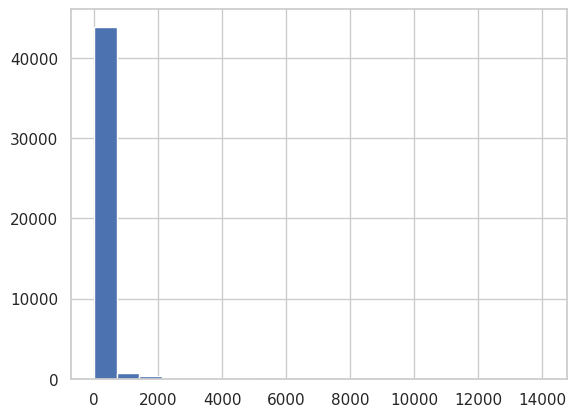

In [144]:
df["vote_count"].hist(bins=20)

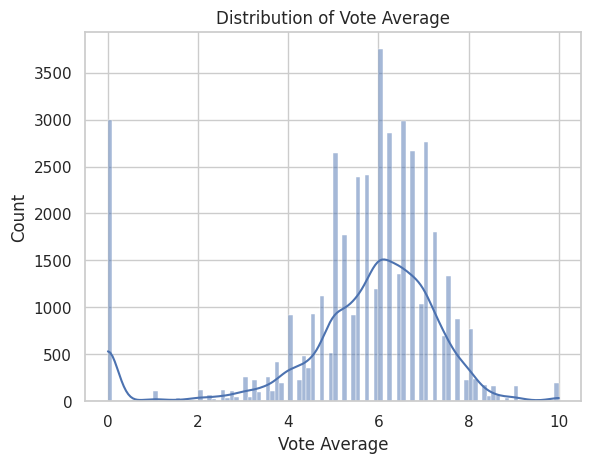

In [145]:
sns.set(style="whitegrid")
sns.histplot(df['vote_average'], kde=True)
plt.title("Distribution of Vote Average")
plt.xlabel("Vote Average")
plt.ylabel("Count")
plt.show()

CHECKING FOR OUTLIERS

<Axes: >

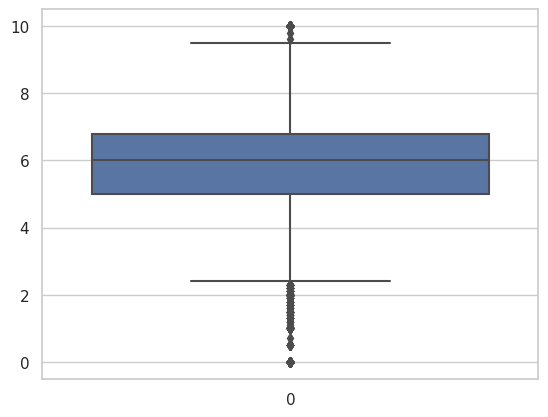

In [146]:
sns.boxplot(df["vote_average"])

<Axes: >

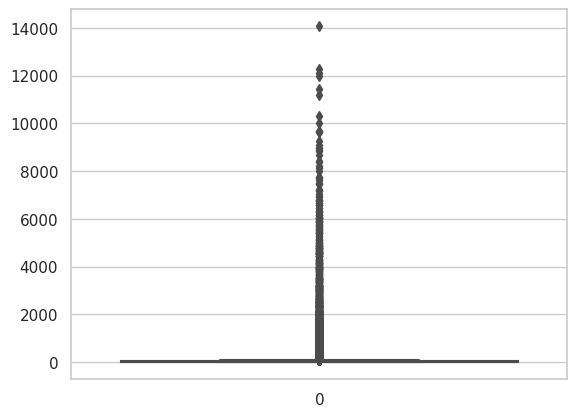

In [147]:
sns.boxplot(df["vote_count"])

Having a varied vote count is not necessarily a problem. Outliers may also contain valuable information, and it's important to investigate why they exist and whether they are valid data points or errors in the data

BUILDING RECOMMNEDER SYSTEM

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :-





> (v / (v + m) * r) + (m / (v + m) * c)


where

*   v is the number of votes for the movie
*   m is the minimum votes required to be listed in the chart;
*   R is the average rating of the movie;
*   C is the mean vote across the whole report



In [148]:
c=df['vote_average'].mean()
c

5.618207215134185

In [149]:
m=df['vote_count'].quantile(0.9)
m

160.0

In [150]:
# Selecting movies with a runtime greater than 150 minutes,evenue greater than 300 million
qm=df[(df['runtime']>150)&(df['revenue']>300000000)]

In [67]:
qm.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
522,False,NaN,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,1993-11-29,3.213656e+08,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0
583,False,NaN,22000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,581,tt0099348,en,Dances with Wolves,"Wounded Civil War soldier, John Dunbar tries t...",...,1990-11-09,4.242088e+08,181.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Inside everyone is a frontier waiting to be di...,Dances with Wolves,False,7.6,1084.0
893,False,NaN,4000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,770,tt0031381,en,Gone with the Wind,An American classic in which a manipulative wo...,...,1939-12-15,4.001765e+08,238.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest romance of all time!,Gone with the Wind,False,7.7,995.0
1639,False,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",...,1997-11-18,1.845034e+09,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0
1808,False,NaN,140000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,95,tt0120591,en,Armageddon,When an asteroid threatens to collide with Ear...,...,1998-07-01,5.537996e+08,151.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Earth's Darkest Day Will Be Man's Finest Hour,Armageddon,False,6.5,2540.0


In [151]:
qm.shape

(38, 24)

In [152]:
qm['vote_count']>=m

522       True
583       True
893       True
1639      True
1808      True
1919      True
3456      True
4182      True
4766      True
4863      True
5678      True
5814      True
6991      True
7000      True
7291      True
10554     True
10598     True
11008     True
11067     True
11827     True
12481     True
13219     True
13605     True
13893     True
14416     True
14551     True
17293     True
18252     True
19971     True
20051     True
20062     True
22059     True
22131     True
22879     True
23617     True
31072     True
31865     True
41820    False
Name: vote_count, dtype: bool

In [153]:
qm=qm[qm['vote_count']>=m]

In [154]:
qm.shape

(37, 24)

In [155]:
def wr(x,m=m,c=c):
    v=x['vote_count']
    r=x['vote_average']
    return (v/(v+m)*r)+(m/(m+v)*c)

In [156]:
qm['score']=qm.apply(wr,axis=1)
qm.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,score
522,False,NaN,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,3.213656e+08,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0,8.206639
583,False,NaN,22000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,581,tt0099348,en,Dances with Wolves,"Wounded Civil War soldier, John Dunbar tries t...",...,4.242088e+08,181.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Inside everyone is a frontier waiting to be di...,Dances with Wolves,False,7.6,1084.0,7.345107
893,False,NaN,4000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,770,tt0031381,en,Gone with the Wind,An American classic in which a manipulative wo...,...,4.001765e+08,238.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest romance of all time!,Gone with the Wind,False,7.7,995.0,7.411613
1639,False,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",...,1.845034e+09,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0,7.462032
1808,False,NaN,140000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,95,tt0120591,en,Armageddon,When an asteroid threatens to collide with Ear...,...,5.537996e+08,151.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Earth's Darkest Day Will Be Man's Finest Hour,Armageddon,False,6.5,2540.0,6.447746


In [157]:
qm=qm.sort_values('score',ascending=False)
qm[['title','vote_count','vote_average','score']].head(10)

,title,vote_count,vote_average,score
12481,The Dark Knight,12269.0,8.3,8.265477
522,Schindler's List,4436.0,8.3,8.206639
22879,Interstellar,11187.0,8.1,8.065005
7000,The Lord of the Rings: The Return of the King,8226.0,8.1,8.052649
4863,The Lord of the Rings: The Fellowship of the Ring,8892.0,8.0,7.957900
5814,The Lord of the Rings: The Two Towers,7641.0,8.0,7.951149
22131,The Wolf of Wall Street,6768.0,7.9,7.847303
13605,Inglourious Basterds,6598.0,7.9,7.845977
3456,Gladiator,5566.0,7.9,7.836241
1919,Saving Private Ryan,5148.0,7.9,7.831220






> you can make a top IMDb tab and list these under them




In [158]:
pop = qm.sort_values(by='popularity', ascending=False)
pop[['title','vote_count','vote_average','score', 'popularity']].head(10)

,title,vote_count,vote_average,score,popularity
522,Schindler's List,4436.0,8.3,8.206639,41.725123
17293,Transformers: Dark of the Moon,3351.0,6.1,6.078044,4.503505
4766,Harry Potter and the Philosopher's Stone,7188.0,7.5,7.459025,38.187238
22879,Interstellar,11187.0,8.1,8.065005,32.213481
4863,The Lord of the Rings: The Fellowship of the Ring,8892.0,8.0,7.957900,32.070725
31072,Batman v Superman: Dawn of Justice,7189.0,5.7,5.698219,31.435879
11827,Pirates of the Caribbean: At World's End,4627.0,6.9,6.857158,31.363664
5678,Harry Potter and the Chamber of Secrets,5966.0,7.4,7.353463,29.741452
11008,Pirates of the Caribbean: Dead Man's Chest,5380.0,7.0,6.960093,29.455314
5814,The Lord of the Rings: The Two Towers,7641.0,8.0,7.951149,29.423537




> you can make a most polular tab and list these under them





---
Demographic filtering is easy to implement and can provide a quick and 
effective solution for recommendation problems. However, it has several limitations and may not work well in all situations. For example, it does not take into account individual preferences or tastes, and may not be effective for recommending niche or specialized items. Additionally, it may suffer from the cold-start problem, where new users or items without sufficient data may not receive accurate recommendations.



---






Demographic filtering is a simple and intuitive recommendation approach. It provides a general chart of recommended movies to all the users. It is not sensitive to the interests and tastes of a particular user.This model was very baseline and only provides a fundamental framework to start with.



---

While demographic filtering is very elemantary and cannot be used practically, Hybrid Systems can take advantage of content-based and collaborative filtering as the two approaches are proved to be almost complimentary. 